# Lab4 - Training Deep Neural Network


## Lab Instruction 

In this lab, you will learn to train a deep fully-connect neural network using Keras library with Tensorflow backend. We will use MNIST data which is a Keras build-in dataset. 

See http://yann.lecun.com/exdb/mnist

**Note:**
Before doing any machine learning/deep learning project, you have to think about the following thing:
1. What is your problem and your data?
- What type of problem do you want to solve? What is your data? What are you trying to predict? Does your data have enough information for your model to predict the expected output?

2. How do you measure your success?
- What do you mean by good model performance? How do you know that your model is ready to be deploy?
- Accuracy? Precision and recall? profit gain? ROC AUC?

3. What is your evaluation method?
- Hold-out method? CV? Iterate CV?

4. How to preprocess your data before fed into a model?

5. What is your baseline? What is a model structure? how does your last layer look like? What is your loss function? What is your optimization function? 

6. Develop a overfit model to figure out how big a model you need by
6.1 Add more layer
6.2 Make layer bigger
6.3 Train more epochs

7. Tune your model to balance the model performance between underfit and overfit (optimization vs generalization)

First, import all important library to this project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
%matplotlib inline

Using TensorFlow backend.


### 1. Load MNIST data

In [2]:
### Load Data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Learn more about the data. For example:
- The distribution of a target class. 
- The characteristic of the input data. How does it looklike? 
- etc.

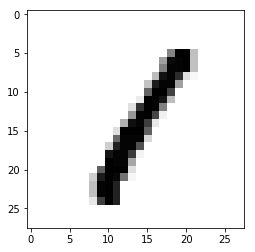

In [3]:
digit = train_images[3]
plt.imshow(digit, cmap=plt.cm.binary)

### 2. Preprocess a data

In [4]:
#reshape + normalrize
train_images = train_images.reshape(60000,28*28).astype('float32')/255
test_images = test_images.reshape(10000,28*28).astype('float32')/255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 3. Build a model 
Using `Sequential()`, build a five-fully connect layer with 128 neuron each, *elu* as an activation function, and *he_initialier* as a weight initialier function. 
The output is a probability of each target class. We will use *Adam optimizer* with the *cross-entropy loss function*.

In [5]:
from keras import models
from keras import layers
from keras import optimizers

adam = optimizers.Adam()

henormal = keras.initializers.he_normal(seed=None)
network = models.Sequential()
network.add(layers.Dense(128, activation='elu',kernel_initializer=henormal,input_shape=(28*28,)))
network.add(layers.Dense(128, activation='elu',kernel_initializer=henormal))
network.add(layers.Dense(128, activation='elu',kernel_initializer=henormal))
network.add(layers.Dense(128, activation='elu',kernel_initializer=henormal))
network.add(layers.Dense(10, activation='softmax',kernel_initializer=henormal))

network.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


### 4. Train the model

We will train a total of 10 epoch and a batch size of 128. 

To prevent an information leak to test set, which casue an overfit, we will split the data to train set, test set, and validation set. Doing so, we will split the training data into 90% train set and 10% validation set.

Since keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be equally distributed in validation set. Thus, we have to use `train_test_split`  from sklearn to split the data into train set and validation set. 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

In [7]:
print(train_images.shape)
print(X_train.shape)

(60000, 784)
(54000, 784)


In [8]:
### Fit the model ### validatdata = valid train and test
history = network.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_val,y_val))
#####################

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 260us/step - loss: 0.2757 - acc: 0.9157 - val_loss: 0.1407 - val_acc: 0.9562
Epoch 2/10
54000/54000 [==============================] - 2s 44us/step - loss: 0.1192 - acc: 0.9633 - val_loss: 0.0962 - val_acc: 0.9692
Epoch 3/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.0873 - acc: 0.9726 - val_loss: 0.0908 - val_acc: 0.9702
Epoch 4/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0645 - acc: 0.9792 - val_loss: 0.0958 - val_acc: 0.9723
Epoch 5/10
54000/54000 [==============================] - 2s 39us/step - loss: 0.0526 - acc: 0.9828 - val_loss: 0.0875 - val_acc: 0.9738
Epoch 6/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0449 - acc: 0.9848 - val_loss: 0.0898 - val_acc: 0.9755
Epoch 7/10
54000/54000 [==============================] - 2s 45us/step - loss: 0.0382 - acc: 0.9876 - val_loss: 0.0746 - val_ac

### 5. Evalute the model

Think of the metric that you want to evaluate/measure the performance of your model that can answer the following questions:
- The model is overfit or underfit.
- At which epoch/iteration that it converge or the model become overfit.
- How does the model perform on each data class. What is an overall performace of your model?

In [11]:
# The function argument is a record or history of the model during training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss',color = 'red')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plot_acc_fn(history):

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc',color = 'red')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

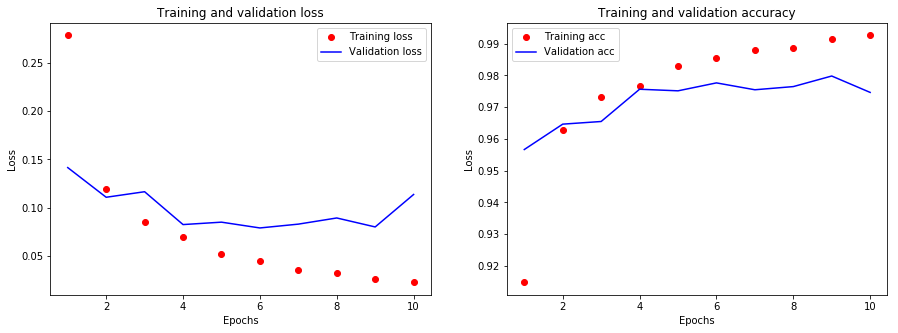

In [12]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
plot_loss_fn(history)
ax2 = fig.add_subplot(1,2,2)
plot_acc_fn(history)

In [15]:
### Evaluate the model ###
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

10000/10000 [==============================] - 1s 54us/step
Test Loss: 0.10220755595274968
Test Accuracy: 0.9737


In [14]:
#Save Model
network.save('baseline.h5')

In [17]:
# load Model
from keras.models import load_model
model_test = load_model('baseline.h5')

In [18]:
test_loss, test_acc = model_test.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

10000/10000 [==============================] - 1s 62us/step
Test Loss: 0.10220755595274968
Test Accuracy: 0.9737


             precision    recall  f1-score   support

          0       0.99      0.99      0.99      5923
          1       1.00      0.98      0.99      6742
          2       1.00      0.99      0.99      5958
          3       0.99      0.99      0.99      6131
          4       0.98      0.99      0.99      5842
          5       0.98      0.99      0.99      5421
          6       0.99      1.00      0.99      5918
          7       0.98      0.99      0.99      6265
          8       0.98      0.98      0.98      5851
          9       0.99      0.97      0.98      5949

avg / total       0.99      0.99      0.99     60000

[[5869    0    0    3    0    9   10   27    3    2]
 [   0 6638    8    5    5    6    6   25   45    4]
 [  15    2 5870   18    0    2    2    8   37    4]
 [   2    0    2 6059    0   24    0    2   38    4]
 [   0    0    2    1 5811    0    7   13    1    7]
 [   2    0    1   13    3 5393    2    3    3    1]
 [   7    0    0    0    0    6 5896    1  

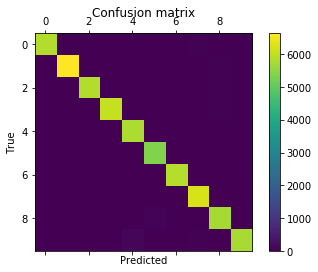

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = network.predict_classes(train_images)
y_true = np.argmax(train_labels, axis=1)
labels = [0,1,2,3,4,5,6,7,8,9,]

cr = classification_report(y_true, y_pred)
print(cr)
cm = confusion_matrix(y_true, y_pred,labels)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 6. Tune the model 

Try to tune your model by: 
1. Try Increasing epoch and see how it affect your model? Does the result better or it get overfit?
2. Apply an early stop. What is the result do you get?
4. Try adding regularizer l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?
5. Try to add dropout (any dropout rate) with every layer. How does it affect your model? Does it help reduce overfit?

*Discuss the result from these step in the discssion section*

After try above step, **try to achive the highest precision** by tuning the model using what you had aleady learn in the class.
You can try to change the structure of the model by increase or decrease the layer and neuron node in each layer. (Use only fully-connect layer, don't use other type of layer yet!)

You can also try to do a data augmentation.

**The current highest precision of MNIST model is around 99.8%** ( Just try as must as possible, don't worry if you don't achieve this number of precision.)

**Write  down what are you doing and why in each tuning step**

In [88]:
adam = optimizers.Adam()

heinit = keras.initializers.he_normal(seed=None)
networkTunning = models.Sequential()

networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit,input_shape=(28*28,)))
networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit))
networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit))
networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit))
networkTunning.add(layers.Dense(10, activation='softmax'))

networkTunning.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
networkTunning.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


## Increasing epoch

In [89]:
callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
#     min_delta=0, 
    patience=3, 
#     verbose=0, 
#     mode='auto', 
#     baseline=None
)
historyTunning = networkTunning.fit(X_train,y_train,epochs=30,batch_size=128,validation_data=(X_val,y_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 3s 55us/step - loss: 0.2690 - acc: 0.9196 - val_loss: 0.1408 - val_acc: 0.9555
Epoch 2/30
54000/54000 [==============================] - 2s 43us/step - loss: 0.1180 - acc: 0.9646 - val_loss: 0.1081 - val_acc: 0.9662
Epoch 3/30
54000/54000 [==============================] - 2s 42us/step - loss: 0.0860 - acc: 0.9728 - val_loss: 0.0894 - val_acc: 0.9732
Epoch 4/30
54000/54000 [==============================] - 2s 43us/step - loss: 0.0634 - acc: 0.9799 - val_loss: 0.1032 - val_acc: 0.9720
Epoch 5/30
54000/54000 [==============================] - 3s 48us/step - loss: 0.0518 - acc: 0.9830 - val_loss: 0.0958 - val_acc: 0.9727
Epoch 6/30
54000/54000 [==============================] - 2s 42us/step - loss: 0.0460 - acc: 0.9848 - val_loss: 0.0943 - val_acc: 0.9747
Epoch 7/30
54000/54000 [==============================] - 2s 42us/step - loss: 0.0374 - acc: 0.9871 - val_loss: 0.1019 - val_acc:

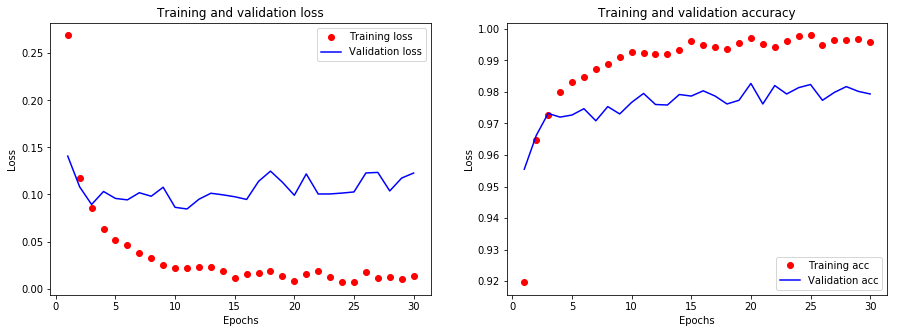

In [100]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
plot_loss_fn(historyTunning)
ax2 = fig.add_subplot(1,2,2)
plot_acc_fn(historyTunning)

In [105]:
### Evaluate the model ###
test_loss, test_acc = networkTunning.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

10000/10000 [==============================] - 1s 92us/step
Test Loss: 0.13035913191752907
Test Accuracy: 0.9763


             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5923
          1       1.00      1.00      1.00      6742
          2       1.00      1.00      1.00      5958
          3       0.99      0.99      0.99      6131
          4       0.99      1.00      1.00      5842
          5       0.99      0.99      0.99      5421
          6       1.00      1.00      1.00      5918
          7       0.99      1.00      0.99      6265
          8       0.99      0.99      0.99      5851
          9       0.99      0.99      0.99      5949

avg / total       1.00      1.00      1.00     60000

[[5900    0    1    0    1    4    3    8    1    5]
 [   0 6718    0    3    4    0    2   12    2    1]
 [   0    2 5936    6    1    1    0    7    4    1]
 [   1    1    4 6086    0   23    0    1   13    2]
 [   0    0    1    0 5827    1    1    4    1    7]
 [   1    1    2    6    5 5386    6    3   11    0]
 [   2    0    1    0    6    3 5905    0  

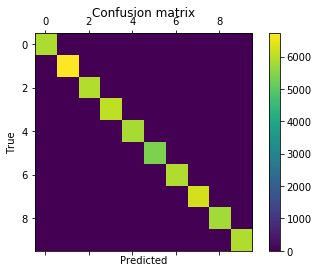

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = networkTunning.predict_classes(train_images)
y_true = np.argmax(train_labels, axis=1)
labels = [0,1,2,3,4,5,6,7,8,9,]

cr = classification_report(y_true, y_pred)
print(cr)
cm = confusion_matrix(y_true, y_pred,labels)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Apply EarlyStopping

In [38]:
callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
)
historyTunning = networkTunning.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_val,y_val),callbacks=[callback])

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 57us/step - loss: 0.2765 - acc: 0.9167 - val_loss: 0.1348 - val_acc: 0.9607
Epoch 2/50
54000/54000 [==============================] - 3s 47us/step - loss: 0.1289 - acc: 0.9605 - val_loss: 0.1093 - val_acc: 0.9663
Epoch 3/50
54000/54000 [==============================] - 3s 47us/step - loss: 0.0909 - acc: 0.9711 - val_loss: 0.0848 - val_acc: 0.9745
Epoch 4/50
54000/54000 [==============================] - 3s 47us/step - loss: 0.0723 - acc: 0.9769 - val_loss: 0.0892 - val_acc: 0.9725
Epoch 5/50
54000/54000 [==============================] - 3s 47us/step - loss: 0.0574 - acc: 0.9812 - val_loss: 0.0793 - val_acc: 0.9760
Epoch 6/50
54000/54000 [==============================] - 3s 47us/step - loss: 0.0482 - acc: 0.9842 - val_loss: 0.0752 - val_acc: 0.9783
Epoch 7/50
54000/54000 [==============================] - 3s 47us/step - loss: 0.0384 - acc: 0.9876 - val_loss: 0.0697 - val_acc:

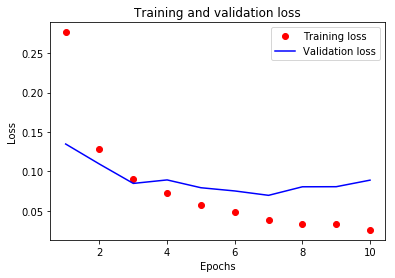

In [39]:
plot_loss_fn(historyTunning)

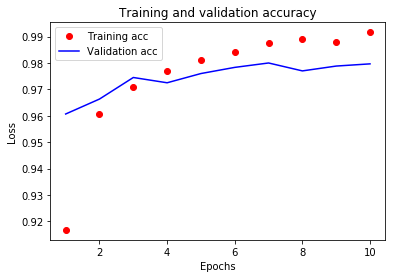

In [40]:
plot_acc_fn(historyTunning)

In [41]:
### Evaluate the model ###
test_loss, test_acc = networkTunning.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

10000/10000 [==============================] - 0s 50us/step
Test Loss: 0.0871961794515
Test Accuracy: 0.9751


## Add regularizer 

In [25]:
from keras import regularizers
adam = optimizers.Adam()

heinit = keras.initializers.he_normal(seed=None)
networkTunning = models.Sequential()

networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit,kernel_regularizer=regularizers.l2(0.001),input_shape=(28*28,)))
networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit,kernel_regularizer=regularizers.l2(0.001)))
networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit,kernel_regularizer=regularizers.l2(0.001)))
networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit,kernel_regularizer=regularizers.l2(0.001)))
networkTunning.add(layers.Dense(10, activation='softmax'))

networkTunning.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
networkTunning.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [26]:
callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
)
historyTunning = networkTunning.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_val,y_val),callbacks=[callback])

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 3s 60us/step - loss: 0.8989 - acc: 0.9072 - val_loss: 0.6257 - val_acc: 0.9485
Epoch 2/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.5250 - acc: 0.9511 - val_loss: 0.4334 - val_acc: 0.9563
Epoch 3/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.3880 - acc: 0.9576 - val_loss: 0.3495 - val_acc: 0.9583
Epoch 4/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.3213 - acc: 0.9603 - val_loss: 0.2890 - val_acc: 0.9632
Epoch 5/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.2795 - acc: 0.9631 - val_loss: 0.2846 - val_acc: 0.9605
Epoch 6/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.2579 - acc: 0.9643 - val_loss: 0.2579 - val_acc: 0.9638
Epoch 7/50
54000/54000 [==============================] - 3s 51us/step - loss: 0.2432 - acc: 0.9658 - val_loss: 0.2308 - val_acc:

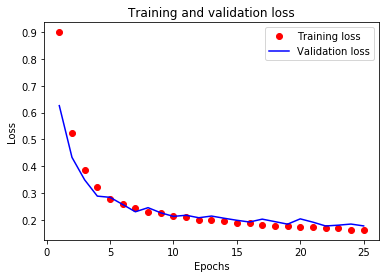

In [27]:
plot_loss_fn(historyTunning)

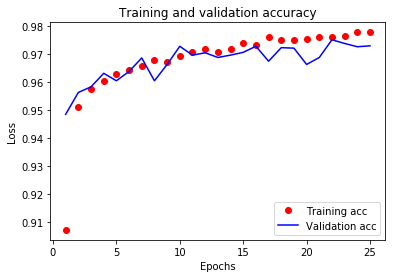

In [28]:
plot_acc_fn(historyTunning)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      5923
          1       0.98      0.99      0.98      6742
          2       0.98      0.98      0.98      5958
          3       0.97      0.98      0.97      6131
          4       0.98      0.98      0.98      5842
          5       0.98      0.97      0.98      5421
          6       0.98      0.99      0.98      5918
          7       0.98      0.98      0.98      6265
          8       0.98      0.98      0.98      5851
          9       0.98      0.96      0.97      5949

avg / total       0.98      0.98      0.98     60000

[[5856    3    9    2    3   15   15    2   13    5]
 [   0 6646   37   35    2    0    8    8    4    2]
 [   5   16 5849   17   25    0   24   13    6    3]
 [   6    3   44 5981    0   16    0   24   35   22]
 [   2   27    3    0 5711    1   46    7    0   45]
 [   8    4    5   84    2 5270   24    1   18    5]
 [  13    6    0    0    1   18 5869    0  

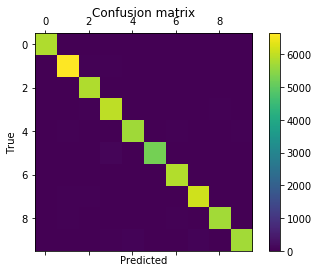

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = networkTunning.predict_classes(train_images)
y_true = np.argmax(train_labels, axis=1)
labels = [0,1,2,3,4,5,6,7,8,9,]

cr = classification_report(y_true, y_pred)
print(cr)
cm = confusion_matrix(y_true, y_pred,labels)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [30]:
### Evaluate the model ###
test_loss, test_acc = networkTunning.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

10000/10000 [==============================] - 1s 61us/step
Test Loss: 0.178021702719
Test Accuracy: 0.9744


## Add Dropout

In [31]:
from keras import regularizers
adam = optimizers.Adam()

heinit = keras.initializers.he_normal(seed=None)
networkTunning = models.Sequential()

networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit,kernel_regularizer=regularizers.l2(0.01),input_shape=(28*28,)))

networkTunning.add(layers.Dropout(0.2))
networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit,kernel_regularizer=regularizers.l2(0.01)))
networkTunning.add(layers.Dropout(0.2))
networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit,kernel_regularizer=regularizers.l2(0.01)))
networkTunning.add(layers.Dense(128, activation='elu',kernel_initializer=heinit,kernel_regularizer=regularizers.l2(0.01)))
networkTunning.add(layers.Dense(10, activation='softmax'))

networkTunning.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# networkTunning.summary()


In [32]:
callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
)
historyTunning = networkTunning.fit(X_train,y_train,epochs=20,batch_size=128,validation_data=(X_val,y_val),callbacks=[callback])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 68us/step - loss: 2.5554 - acc: 0.8657 - val_loss: 0.8159 - val_acc: 0.9047
Epoch 2/20
54000/54000 [==============================] - 3s 56us/step - loss: 0.7677 - acc: 0.8865 - val_loss: 0.6890 - val_acc: 0.8987
Epoch 3/20
54000/54000 [==============================] - 3s 56us/step - loss: 0.7035 - acc: 0.8890 - val_loss: 0.6568 - val_acc: 0.9023
Epoch 4/20
54000/54000 [==============================] - 3s 56us/step - loss: 0.6759 - acc: 0.8928 - val_loss: 0.6650 - val_acc: 0.8892
Epoch 5/20
54000/54000 [==============================] - 3s 57us/step - loss: 0.6580 - acc: 0.8932 - val_loss: 0.6139 - val_acc: 0.9068
Epoch 6/20
54000/54000 [==============================] - 3s 56us/step - loss: 0.6438 - acc: 0.8958 - val_loss: 0.5848 - val_acc: 0.9137
Epoch 7/20
54000/54000 [==============================] - 3s 56us/step - loss: 0.6295 - acc: 0.8973 - val_loss: 0.6042 - val_acc:

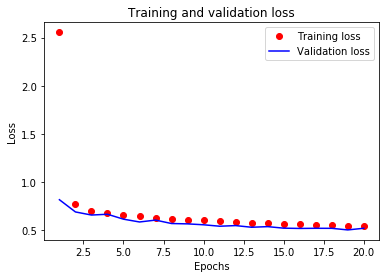

In [33]:
plot_loss_fn(historyTunning)

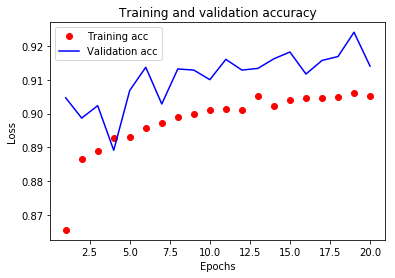

In [34]:
plot_acc_fn(historyTunning)

In [35]:
### Evaluate the model ###
test_loss, test_acc = networkTunning.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

10000/10000 [==============================] - 1s 64us/step
Test Loss: 0.510318048859
Test Accuracy: 0.9146


             precision    recall  f1-score   support

          0       0.96      0.96      0.96      5923
          1       0.95      0.97      0.96      6742
          2       0.92      0.89      0.90      5958
          3       0.97      0.80      0.87      6131
          4       0.88      0.91      0.90      5842
          5       0.89      0.85      0.87      5421
          6       0.95      0.93      0.94      5918
          7       0.94      0.94      0.94      6265
          8       0.82      0.93      0.87      5851
          9       0.86      0.93      0.89      5949

avg / total       0.91      0.91      0.91     60000

[[5669    0   16    6   24   38   29   24   78   39]
 [   0 6514   33    7    8   25    7    8  112   28]
 [  31   64 5298   37  156    7   50  106  187   22]
 [  24   55  237 4893    7  368   26   78  357   86]
 [   8   18   10    0 5342    1   23   12   35  393]
 [  75   34   41   69   73 4599  128   33  300   69]
 [  48   21   33    0  254   37 5477    0  

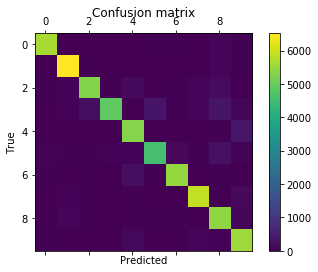

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
y_pred = networkTunning.predict_classes(train_images)
y_true = np.argmax(train_labels, axis=1)
labels = [0,1,2,3,4,5,6,7,8,9,]

cr = classification_report(y_true, y_pred)
print(cr)
cm = confusion_matrix(y_true, y_pred,labels)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# god level

In [100]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

In [102]:
sgd = optimizers.sgd(lr=0.005)

heinit = keras.initializers.he_normal(seed=None)
networkTunning = models.Sequential()

networkTunning.add(layers.Dense(784, activation='elu',kernel_initializer=heinit,input_shape=(28*28,)))
networkTunning.add(layers.Dense(784, activation='elu',kernel_initializer=heinit))
networkTunning.add(layers.Dense(784, activation='relu',kernel_initializer=heinit))
networkTunning.add(layers.Dense(784, activation='relu',kernel_initializer=heinit,kernel_regularizer=regularizers.l2(0.01)))
networkTunning.add(layers.Dense(784, activation='linear',kernel_initializer=heinit))
networkTunning.add(layers.Dense(784, activation='linear',kernel_initializer=heinit))
networkTunning.add(layers.Dense(10, activation='softmax'))

networkTunning.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
networkTunning.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_49 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_50 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_51 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_52 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_53 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_54 (Dense)             (None, 10)                7850      
Total para

In [103]:
callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
)
historyTunning = networkTunning.fit(X_train,y_train,epochs=30,batch_size=128,validation_data=(X_val,y_val),callbacks=[callback])

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 6s 119us/step - loss: 15.4507 - acc: 0.8684 - val_loss: 14.6484 - val_acc: 0.9230
Epoch 2/30
54000/54000 [==============================] - 5s 97us/step - loss: 14.0282 - acc: 0.9317 - val_loss: 13.4258 - val_acc: 0.9400
Epoch 3/30
54000/54000 [==============================] - 5s 98us/step - loss: 12.8677 - acc: 0.9453 - val_loss: 12.3293 - val_acc: 0.9500
Epoch 4/30
54000/54000 [==============================] - 5s 98us/step - loss: 11.8162 - acc: 0.9542 - val_loss: 11.3316 - val_acc: 0.9560
Epoch 5/30
54000/54000 [==============================] - 5s 97us/step - loss: 10.8563 - acc: 0.9604 - val_loss: 10.4177 - val_acc: 0.9603
Epoch 6/30
54000/54000 [==============================] - 5s 97us/step - loss: 9.9767 - acc: 0.9646 - val_loss: 9.5769 - val_acc: 0.9625
Epoch 7/30
54000/54000 [==============================] - 5s 98us/step - loss: 9.1706 - acc: 0.9685 - val_loss: 8.8039

### 7. Final Evaluation

After you make sure that your model is good enough to be deploy in application, it is a time to evaluate your model with test set in order to test that your model is generalize well and not overfit to validation set.

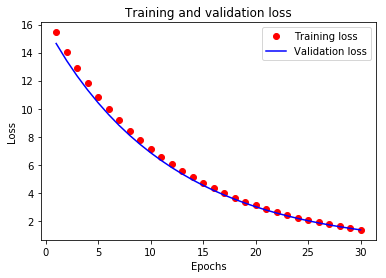

In [104]:
plot_loss_fn(historyTunning)

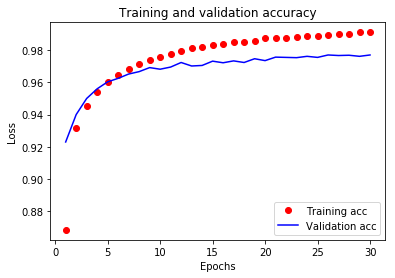

In [105]:
plot_acc_fn(historyTunning)

In [106]:
### Evaluate the model ###
test_loss, test_acc = networkTunning.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

10000/10000 [==============================] - 1s 78us/step
Test Loss: 1.3499076578140259
Test Accuracy: 0.9752


### 8. Play with your model

1. Use any kind of drawing application ( For example, Paint or Adobe Photoshop ), create a 28x28 pixel (any resolution) with white background and black paint. 
2. Draw 3 any distinct single digit number of a range from 0 - 9. Then save the image (PNG)
3. Install open-cv (See https://pypi.org/project/opencv-python) by 
> `pip install opencv-python` <br/> or conda (See https://anaconda.org/conda-forge/opencv)
4. Load your image to this IPython using ```imread()``` function
5. Preprocess as what you did during the development stage.
6. Feed your image to your best model.

What class do your model predict? Does it correct? If not, why do it still get negative result since your model get more than 90% accuracy?

In [107]:
import cv2
import numpy as np

In [108]:
import glob

In [109]:
image_list = []
for filename in glob.glob('img/*.png'):
    image_list.append(cv2.imread(filename,0))

In [110]:
input_img = np.asarray(image_list)

import matplotlib.pyplot as plt
%matplotlib inline

img_reshape = 1-(input_img.reshape(30,28*28).astype('float32')/255)
# img_reshape[0]
# plt.imshow(input_img[3]*255, cmap=plt.cm.binary)

In [111]:
y_pred = networkTunning.predict_classes(img_reshape)
print(y_pred)

[2 0 0 2 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6 3 2 3 8 8 1 7 9 9]


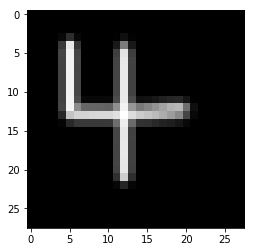

In [72]:
image1 = cv2.imread('img/4-1.png',0)
image2 = cv2.imread('img/2-2.png',0)
image3 = cv2.imread('img/0-3.png',0)
# print(image.shape)

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image1, cmap=plt.cm.binary)

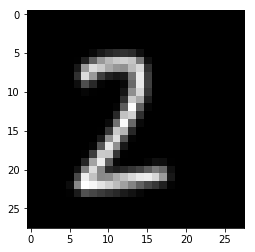

In [73]:
plt.imshow(image2, cmap=plt.cm.binary)

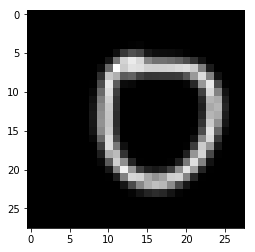

In [74]:
plt.imshow(image3, cmap=plt.cm.binary)

In [ ]:
# image.shape
image1 = 1-(image1.reshape(1,28*28).astype('float32')/255)
image2 = 1-(image2.reshape(1,28*28).astype('float32')/255)
image3 = 1-(image3.reshape(1,28*28).astype('float32')/255)
# test[3]

In [77]:
print(networkTunning.predict_classes(image1))
print(networkTunning.predict_classes(image2))
print(networkTunning.predict_classes(image3))

[8]
[8]
[8]


## Answer 
ถูกต้องมากกว่า 90% และส่วนที่ไม่ถูกอาจจะเป็นเพราะลายมือที่เขียนไปตรงกับเลขอื่นมากกว่า (ตาม weight ใน Model) จึงทำให้ค่าออกมาผิดบ้าง และด้วย Training Set ที่อาจจะยังไม่มากพอจึงทำให้ model ไม่ถูกต้อง 100%

### Challenges: Play with initializer

- Create two-layer neural network with any hyperparameter
- Use or create an weight initializer function that initialize all the weight to one. See: https://keras.io/initializers/
- Discuss the result. what happen? and why?